# explore dataset
now we explore how the questions are set to work

Imports and Setup: The script begins by importing necessary libraries such as os, json, pandas, and matplotlib.pyplot. It then sets the path to the JSON file containing your data.
Data Loading: The JSON data is loaded into a Python dictionary using the json.load() function.
Data Processing: A loop iterates over each entry in the 'questions' list of your JSON data. It collects the 'type' of each question and appends it to a list called question_types.
Data Analysis: The list of question types is converted into a pandas DataFrame for easier handling. The value_counts() method is used on the DataFrame to compute the frequency of each type of question.
Visualization: Using matplotlib, a bar plot is created to visually represent the frequency of each question type. Adjustments are made for aesthetics, such as setting the figure size, adding labels and titles, and rotating the x-axis labels for better readability.



Processing data: 100%|██████████| 4064/4064 [00:00<00:00, 833283.70it/s]


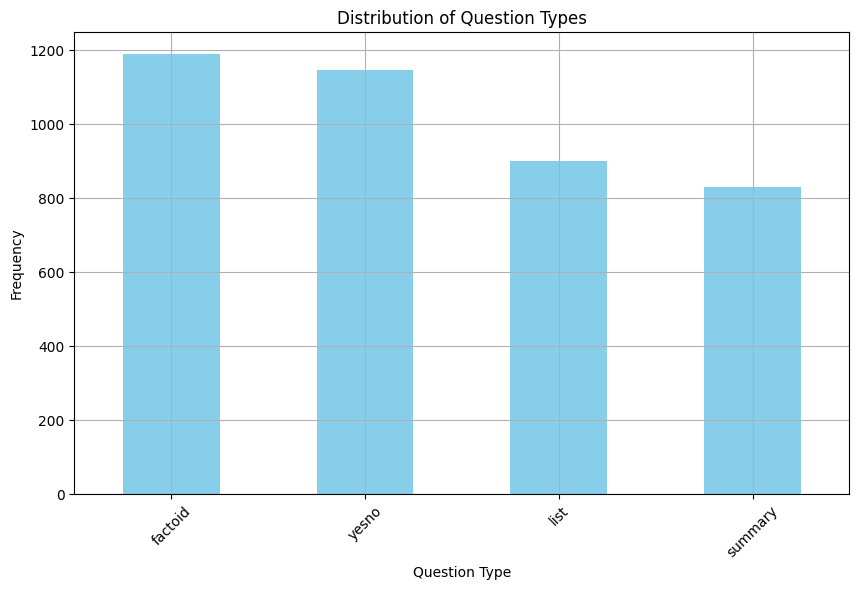

Type
factoid    1190
yesno      1145
list        900
summary     829
Name: count, dtype: int64

In [3]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Specify the path to the JSON file
output_json_path = os.path.expanduser('~/Questions_answers_data/all_questions_in_system.json')

# Load the data from the JSON file
with open(output_json_path, 'r') as file:
    data = json.load(file)

# Initialize an empty list to collect the question types
question_types = []

# Iterate over each entry in the JSON data
for entry in tqdm(data['questions'], desc='Processing data'):
    question_types.append(entry['type'])  # Append the type of each question to the list

# Convert the list to a DataFrame for easier manipulation
df = pd.DataFrame(question_types, columns=['Type'])

# Count the frequency of each question type
type_counts = df['Type'].value_counts()

# Create a bar plot to visualize the counts of each question type
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Question Types')
plt.xlabel('Question Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
type_counts

In [5]:
import pandas as pd

# Assuming 'data' is already loaded and contains the JSON data with the key 'questions'
# We will create a DataFrame from the loaded data
df = pd.DataFrame(data['questions'])

# Group the data by the 'type' and get the first five entries for each type
grouped_samples = df.groupby('type').head(5)

# Print the first five examples for each question type
print("First 5 examples per question type:")
print(grouped_samples)


First 5 examples per question type:
                                              triples  \
0                                                  []   
1                                                  []   
2                                                  []   
3                                                  []   
4   [{'p': 'http://www4.wiwiss.fu-berlin.de/diseas...   
5                                                 NaN   
6                                                  []   
7                                                  []   
8                                                 NaN   
9                                                 NaN   
10                                                 []   
11                                                 []   
13                                                 []   
14                                                 []   
16                                                 []   
18                                                 [

we use this function ot approximate the beahvour excpected by whatever linus is doing

In [6]:
import random
def dummy_request(query, querytype):
    # Generate a dummy list of PubMed IDs
    pubIDs = [random.randint(100000, 999999) for _ in range(5)]  # Randomly generate 5 PubMed IDs

    # Use a match-case to handle different types of queries
    match querytype:
        case 'yesno':
            result = random.choice(['Yes', 'No'])
        case 'summary':
            result = "Yes, ahdhs is deadly"
        case 'factoid':
            result = "Cancer"
        case 'list':
            result = ['Anemia', 'Bronchitis', 'Cholecystitis', 'Dermatitis']
        case _:
            result = "Unsupported query type"
    
    # Return a tuple of the result and the list of PubMed IDs
    return result, pubIDs

In [ ]:
genaue standards definiert auf ipad zeichnung am 24 april

{
    "questionid": "54e25eaaae9738404b000017", // Unique identifier for the question
    "question": "Is the protein Papilin secreted?", // The text of the question posed
    "trueresponse": "Yes, papilin is a secreted protein", // The correct answer from the dataset
    "ragresponse": "Yes", // The answer provided by the RAG system
    "querytype": "yesno", // Type of the question (e.g., yesno, factoid, list, summary)
    "answered_correct": "true", // Whether the RAG system's response was correct (true, false, partly)
    "percentage_correct_answers": 100, // Percentage of correct answers provided by the RAG system (hypothetical)
    "returned_correct_pubmedid": true, // Indicates if the correct PubMed IDs were returned
    "numb_of_pubmedid_returned": 8, // Number of PubMed IDs returned by the RAG system
    "pubmedids": [
        "21784067",
        "20805556",
        "19724244",
        "19297413",
        "15094122",
        "15094110",
        "12666201",
        "11076767",
        "7515725",
        "3320045"
    ] // List of PubMed IDs referenced by the RAG system
}


In [10]:
{
    "questionid": "54e25eaaae9738404b000017", // Unique identifier for the question
    "question": "Is the protein Papilin secreted?", // The text of the question posed
    "trueresponse": "Yes, papilin is a secreted protein", // The correct answer from the dataset
    "ragresponse": "Yes", // The answer provided by the RAG system
    "querytype": "yesno", // Type of the question (e.g., yesno, factoid, list, summary)
    "answered_correct": "true", // Whether the RAG system's response was correct (true, false, partly)
    "percentage_correct_answers": 100, // Percentage of correct answers provided by the RAG system (hypothetical)
    "returned_correct_pubmedid": true, // Indicates if the correct PubMed IDs were returned
    "numb_of_pubmedid_returned": 8, // Number of PubMed IDs returned by the RAG system
    "requestime": 0.2, // time it took  for the entire request
    "pubmedids": [
        "21784067",
        "20805556",
        "19724244",
        "19297413",
        "15094122",
        "15094110",
        "12666201",
        "11076767",
        "7515725",
        "3320045"
    ] // List of PubMed IDs referenced by the RAG system
}

#this is a not working example what each eval should return

SyntaxError: unterminated string literal (detected at line 7) (2578088295.py, line 7)

In [4]:

import time
from tqdm import tqdm
import re


class RAG_evaluator():
    def __init__(self,path_to_question_json,output_path):
        # Initialization can be used to set up necessary variables or states
        self.path_to_jsonfile = path_to_question_json
        self.output_path = output_path

    def run_eval(self):
        start_time = time.time()  # Start timing

        # Read the input JSON file
        with open(self.path_to_jsonfile, 'r') as file:
            data = json.load(file)

        results = []

        # Process each question and display progress
        for question in tqdm(data['questions'], desc="Processing questions"):
            #response = self.request_selector(question['id'], question['type'])
            response = self.request_selector(question)
            results.append(response)

        # Write the results to the output JSON file
        with open(self.output_path, 'w') as file:
            json.dump(results, file, indent=4)

        end_time = time.time()  # End timing
        elapsed_time = end_time - start_time
        print(f"Results written to {self.output_path}")
        print(f"Processing time: {elapsed_time:.2f} seconds")
        
    
  



    def request_selector(self,question):
        #time request
        start_time = time.time()
        # Method to evaluate  based on the query type
        response, pubmedids = dummy_request(question["body"],question["type"])
        # Stop timing
        end_time = time.time()
        # Calculate elapsed time in seconds
        elapsed_time = end_time - start_time
        correct_pubmed, num_correct_pubmed, matched_ids= self.compare_pubmed_ids(pubmedids, question["documents"])

        
        
        
        
        
        
        match question["type"]:
            case 'yesno':
                 answered_correct,percentage_correct_answers = self.yesno_eval(response,question["exact_answer"])
            case 'summary':
                answered_correct,percentage_correct_answers = self.summary_eval(queryID)
            case 'factoid':
                answered_correct,percentage_correct_answers = self.factoid_eval(queryID)
            case 'list':
                answered_correct,percentage_correct_answers = self.list_eval(queryID)
            case _:
                answered_correct = -5 # show that an error occured
                percentage_correct_answers = -5
                
            
            
            
        return {
            "questionid": question["id"],
            "querytype": question["type"],
            "question": question["body"],
            "trueresponse_exact": question["exact_answer"],
            "ragresponse": response,
            "answered_correct": answered_correct,
            "percentage_correct_answers": percentage_correct_answers,
            "returned_correct_pubmedid": correct_pubmed,
            "numb_of_pubmedid_returned": num_correct_pubmed,
            "pubmedids": matched_ids,
             "requestime":elapsed_time
        }



    def factoid_eval(self,queryID):
        # Placeholder for factoid evaluation logic
        return "lol","lol"

    def summary_eval(self,queryID):
        # Placeholder for summary evaluation logic
        return "lol","lol"

    def yesno_eval(self, rag_response, true_response):
        # Define valid responses
        valid_responses = {"yes", "no"}
        
        # Check if both responses are valid
        if rag_response.lower() not in valid_responses or true_response.lower() not in valid_responses:
            return -5, -5
        
        # Calculate if the answers are correct (1 if true, 0 if false)
        answered_correct = True if rag_response.lower() == true_response.lower() else False
        
        # Since it's a single comparison, correct percentage is 100% or 0%
        percentage_correct_answers = 100 if answered_correct else 0
        
        return answered_correct, percentage_correct_answers

    def list_eval(self,queryID):
        # Placeholder for list evaluation logic
        return "lol","lol"

    def compare_pubmed_ids(pubmed_ids, documents):
        # Extract PubMed IDs from the document URLs
        extracted_ids = [re.search(r'pubmed/(\d+)', doc).group(1) for doc in documents if re.search(r'pubmed/(\d+)', doc)]
        
        # Compare the extracted IDs with the provided list of PubMed IDs
        matched_ids = [pid for pid in extracted_ids if pid in pubmed_ids]
        
        # Determine if any correct PubMed ID was found
        correct_pubmed = len(matched_ids) > 0
        
        # Number of correct PubMed IDs found
        num_correct_pubmed = len(matched_ids)
        
        return correct_pubmed, num_correct_pubmed, matched_ids





In [8]:
#here we test the above provided class

eval = RAG_evaluator("/home/ubuntu/Questions_answers_data/all_questions_in_system.json","/home/ubuntu/Questions_answers_data")
eval.run_eval()

FileNotFoundError: [Errno 2] No such file or directory: 'Questions_answers_data/all_questions_in_system.json'

here we have some tests of the above functions to validate their accuary


In [12]:
import re
def compare_pubmed_ids(pubmed_ids, documents):
        # Extract PubMed IDs from the document URLs
        extracted_ids = [re.search(r'pubmed/(\d+)', doc).group(1) for doc in documents if re.search(r'pubmed/(\d+)', doc)]
        
        # Compare the extracted IDs with the provided list of PubMed IDs
        matched_ids = [pid for pid in extracted_ids if pid in pubmed_ids]
        
        # Determine if any correct PubMed ID was found
        correct_pubmed = len(matched_ids) > 0
        
        # Number of correct PubMed IDs found
        num_correct_pubmed = len(matched_ids)
        
        return correct_pubmed, num_correct_pubmed, matched_ids


# Example usage:
pubmed_ids_list = ['23392090', '22986150', '99999999']  # Example list of PubMed IDs
documents_list = [
    "http://www.ncbi.nlm.nih.gov/pubmed/23392090",
    "http://www.ncbi.nlm.nih.gov/pubmed/22986150",
    "http://www.ncbi.nlm.nih.gov/pubmed/21459689",
    # Other URLs...
]

correct_pubmed, num_correct_pubmed, true_pubmed_ids = compare_pubmed_ids(pubmed_ids_list, documents_list)
print("Correct PubMed Found:", correct_pubmed)
print("Number of Correct PubMed IDs:", num_correct_pubmed)
print("True PubMed IDs:", true_pubmed_ids)

Correct PubMed Found: True
Number of Correct PubMed IDs: 2
True PubMed IDs: ['23392090', '22986150']
